# Importing the Dependencies

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection & Processing 

In [10]:
# loading the CSV data to a Pandas Dataframe
gold_data = pd.read_csv('new csv/gld_price_data.csv')

In [12]:
# print first 5 rows in dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [14]:
# print last 5 rows in dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [16]:
# number of rows & columns
gold_data.shape

(2290, 6)

In [18]:
# getting some basic information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [20]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [22]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation
#### Positive Correlation
#### Negative Correlation

In [34]:
correlation = gold_data.corr(numeric_only=True)

<Axes: >

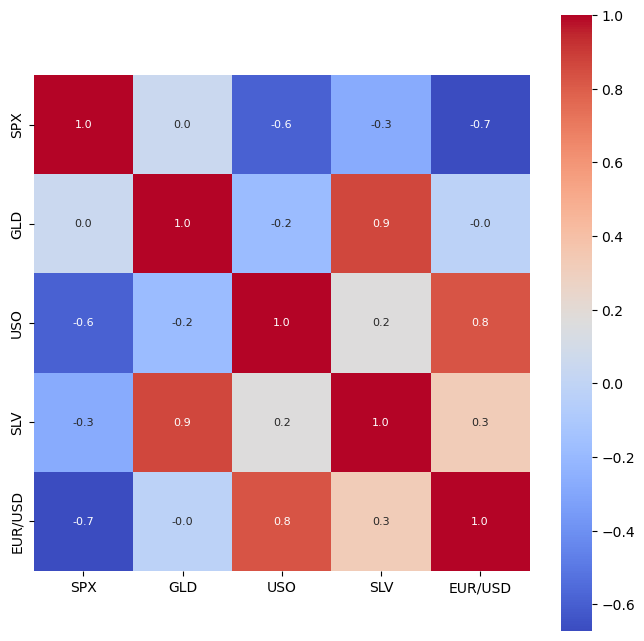

In [38]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='coolwarm')

In [40]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


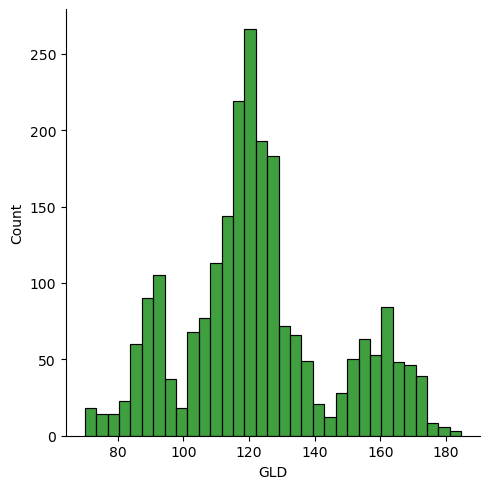

In [42]:
# checking the distribution of the GLD price
sns.displot(gold_data['GLD'], color='green')

# Splitting the Feature & Target

In [51]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [53]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into Training & Test data

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [58]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


# Model Training : Random Forest Regressor

In [63]:
regressor = RandomForestRegressor(n_estimators=100)

In [65]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

# Model Evaluation 

In [68]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.67309923  81.81789984 116.4953005  127.57190098 120.81300113
 154.75209726 150.02209809 126.24300056 117.41369873 126.09060064
 116.54600084 172.06090084 141.17099872 167.87639801 115.10479993
 117.66070048 139.64340334 170.20620137 159.82750322 156.98769901
 155.0997001  125.48160011 176.33969887 157.31830249 125.12480047
  93.87629955  77.91450013 120.66339995 119.1672997  167.51190002
  88.12070088 125.22199999  91.05750043 117.72380028 121.16919936
 136.61170045 115.40390132 115.21410063 147.87419888 107.1910012
 104.62860233  87.32079818 126.60840042 117.97349972 154.07089937
 119.70349998 108.36479992 108.02409835  93.30690023 127.16699779
  74.98570034 113.76479952 121.42690011 111.27929914 118.8163989
 120.45209974 159.5565003  170.1440007  147.20749725  85.68619859
  94.26480007  86.70889897  90.62550011 118.91320081 126.53100083
 127.46969968 169.92759946 122.23569952 117.38129853  98.26680021
 168.05970261 142.90049826 132.3772023  121.19900236 121.26079967
 119.5003006

In [70]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R square error : ', error_score)

R square error :  0.9886335770997062


In [72]:
# Compare the Actual Values & Predicted Values
Y_test = list(Y_test)

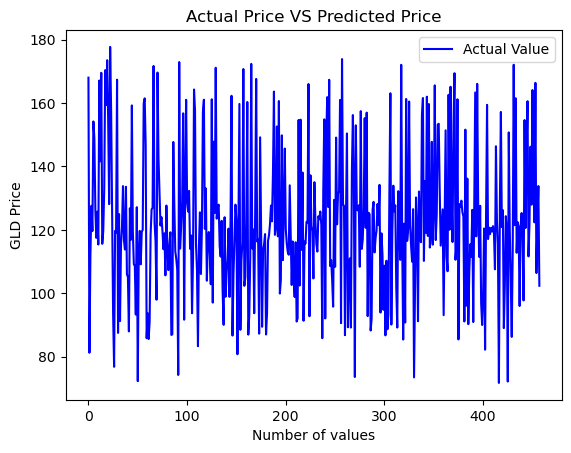

In [76]:
plt.plot(Y_test, color='blue', label='Actual Value')
#plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

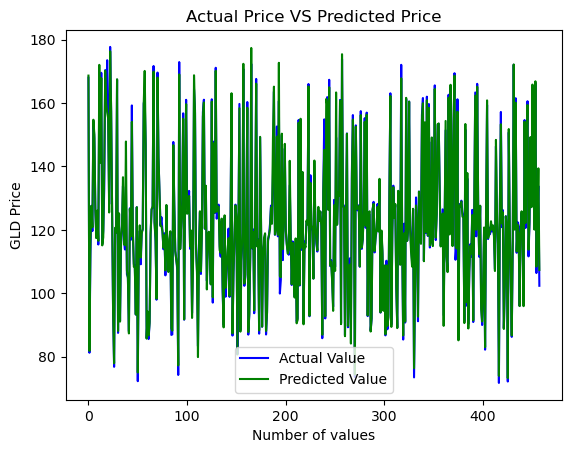

In [78]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price VS Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()